In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
print(f"Python Version: {sys.version.split()[0]}")

Python Version: 3.12.9


# Chebyshev Interpolation

Compute and plot the roots of the Chebyshev polynomials 

 Roots of the Chebyshev polynomial T_10:
[ 0.98768834  0.89100652  0.70710678  0.4539905   0.15643447 -0.15643447
 -0.4539905  -0.70710678 -0.89100652 -0.98768834]


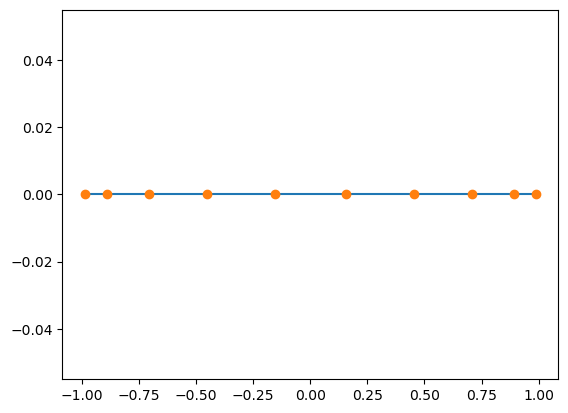

In [2]:
n = 10
k = np.array(range(1,n+1))
x_r = np.cos((2*k-1)/(2*n) * np.pi)
print(f" Roots of the Chebyshev polynomial T_{n}:\n{x_r}")
plt.plot(x_r,np.zeros(n),x_r,np.zeros(n),'o')

Test function for interpolation: The famous Runge function

In [3]:
def runge(x: float | np.ndarray) -> float | np.ndarray:
    """The Runge function. Can be used to test Lagrangian interpolation. With the
    current scaling it is defined on the interval [-1,1].
    
    Args:
        x: a float or a numpy array of floats.
    Returns:
        The value of the Runge function at x.
    """
    return 1 / (1 + 25 * x * x)

Define the Neville method to evaluate interpolants

In [4]:
def neville(x: float, x_i: np.ndarray, f_i: np.ndarray) -> np.ndarray:
    """Implements Neville's method to evaluate a Lagrange interpolant
    
    Args:
      x: The point at which the interpolant is evaluated
      x_i: The interpolation nodes
      f_i: The function values at the interpolation nodes
      
    Returns:
      The last row of the Neville table
    """
    n = len(x_i)
    Q = np.zeros((n,n))
    Q[:,0] = f_i
    for i in range(1,n):
        for j in range(1,i+1):
            Q[i,j] = ((x - x_i[i-j]) * Q[i,j-1] - (x - x_i[i]) * Q[i-1,j-1]) / (x_i[i] - x_i[i-j])
    return Q[n-1,:]

Define interpolation nodes: Equidistant, random, and Chebyshev

In [5]:
N = 10
nodes = { 
    "Equidistant" : np.linspace(-1,1,N+1,endpoint=True),
    "Random" : np.random.uniform(-1,1,N+1),
    "Chebyshev" : np.cos((2 * np.array(range(1,N+2)) - 1) / ( 2 * (N + 1)) * np.pi)
}

Plot the Runge function and the interpolant

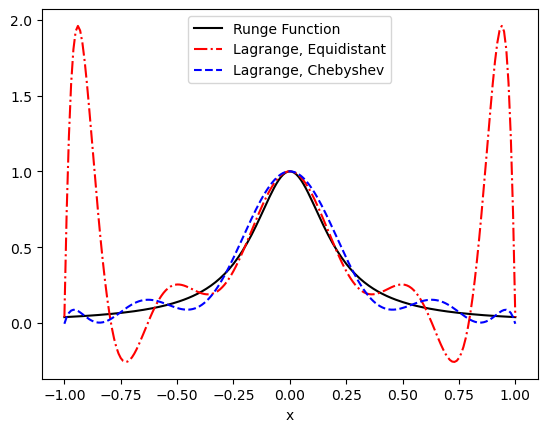

In [6]:
N_s = 20 * N
x_s = np.linspace(-1,1,N_s + 1,endpoint=True)

L_rand = np.array([neville(x, nodes["Random"], runge(nodes["Random"]))[-1] for x in x_s])
L_equi = np.array([neville(x, nodes["Equidistant"], runge(nodes["Equidistant"]))[-1] for x in x_s])
L_cheb = np.array([neville(x, nodes["Chebyshev"], runge(nodes["Chebyshev"]))[-1] for x in x_s])

plt.plot(x_s, runge(x_s), '-k', label="Runge Function")
plt.plot(x_s, L_equi, '-.r', label="Lagrange, Equidistant")
plt.plot(x_s, L_cheb, '--b', label="Lagrange, Chebyshev")
plt.xlabel('x')
plt.legend()

Maximum Error: 1.9156430502192492 (Equidistant), 0.10892903989244818 (Chebyshev), 353.90625764723677 (Random)


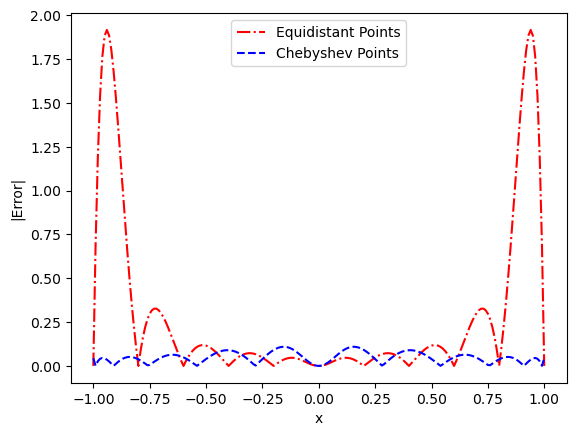

In [7]:
error_rand = np.abs(L_rand - runge(x_s))
error_equi = np.abs(L_equi - runge(x_s))
error_cheb = np.abs(L_cheb - runge(x_s))

plt.plot(x_s, error_equi, '-.r', label="Equidistant Points")
plt.plot(x_s, error_cheb, '--b', label="Chebyshev Points")
plt.xlabel('x')
plt.ylabel("|Error|")
plt.legend()

print(f"Maximum Error: {max(error_equi)} (Equidistant), {max(error_cheb)} (Chebyshev), {max(error_rand)} (Random)")

The monic polynomials

The monic polynomial $\omega(x) = (x-x_0) \dots (x-x_n)$ of equidistant distant nodes is essentially wilkinsons' polynomial. For the Chebyshev nodes it is the monic Chebyshev polynomial of order $N+1$

(1e-05, 0.01)

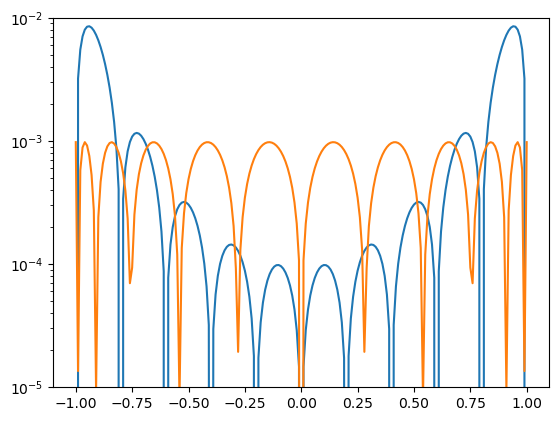

In [11]:
w_equi = np.ones(N_s+1)
for i in range(N+1):
    w_equi = w_equi * (x_s - nodes["Equidistant"][i])
w_cheb = np.ones(N_s+1)
for i in range(N+1):
    w_cheb = w_cheb * (x_s - nodes["Chebyshev"][i])
plt.semilogy(x_s, np.abs(w_equi), x_s, np.abs(w_cheb))
plt.ylim((1.e-5,1.e-2))
